In [1]:
# importing pre-requisite libraries
import pandas as pd
import numpy as np
import yaml
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Get the absolute path of the credit_risk package
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
print(project_root)

c:\Aravind's File\Projects\credit_risk


In [3]:
#importing the modules from the package
from utils.utils import *
from utils.eda_utils import *

In [4]:
config_ = load_config()
config_

{'data': {'path': "C:/Aravind's File/Projects/credit_risk/data",
  'credit_data': 'german_credit_data.csv'}}

In [5]:
data_path_list = return_config_params('data')
data_path_list

{'path': "C:/Aravind's File/Projects/credit_risk/data",
 'credit_data': 'german_credit_data.csv'}

In [6]:
# Load the data
credit_data = pd.read_csv(os.path.join(data_path_list['path'], data_path_list['credit_data']))
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# 1. Basic EDA

In [7]:
# data description
# It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:
# 1.	Age (numeric)
# 2.	Sex (text: male, female)
# 3.	Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
# 4.	Housing (text: own, rent, or free)
# 5.	Saving accounts (text - little, moderate, quite rich, rich)
# 6.	Checking account (numeric, in DM - Deutsch Mark)
# 7.	Credit amount (numeric, in DM)
# 8.	Duration (numeric, in month)
# 9.	Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
# 10.	Risk (text: good, bad)

In [8]:
# data types
credit_data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [10]:
#target variable check
credit_data['Risk'].value_counts() # it shows that our target variable is imbalanced

Risk
good    700
bad     300
Name: count, dtype: int64

In [11]:
# missing values check
credit_data.isnull().sum() # it shows that there are missing values in saving accounts and checking account

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

# 2. EDA


## 2.1 Numerical Variable Analysis

### 2.1.1 Age group Analysis

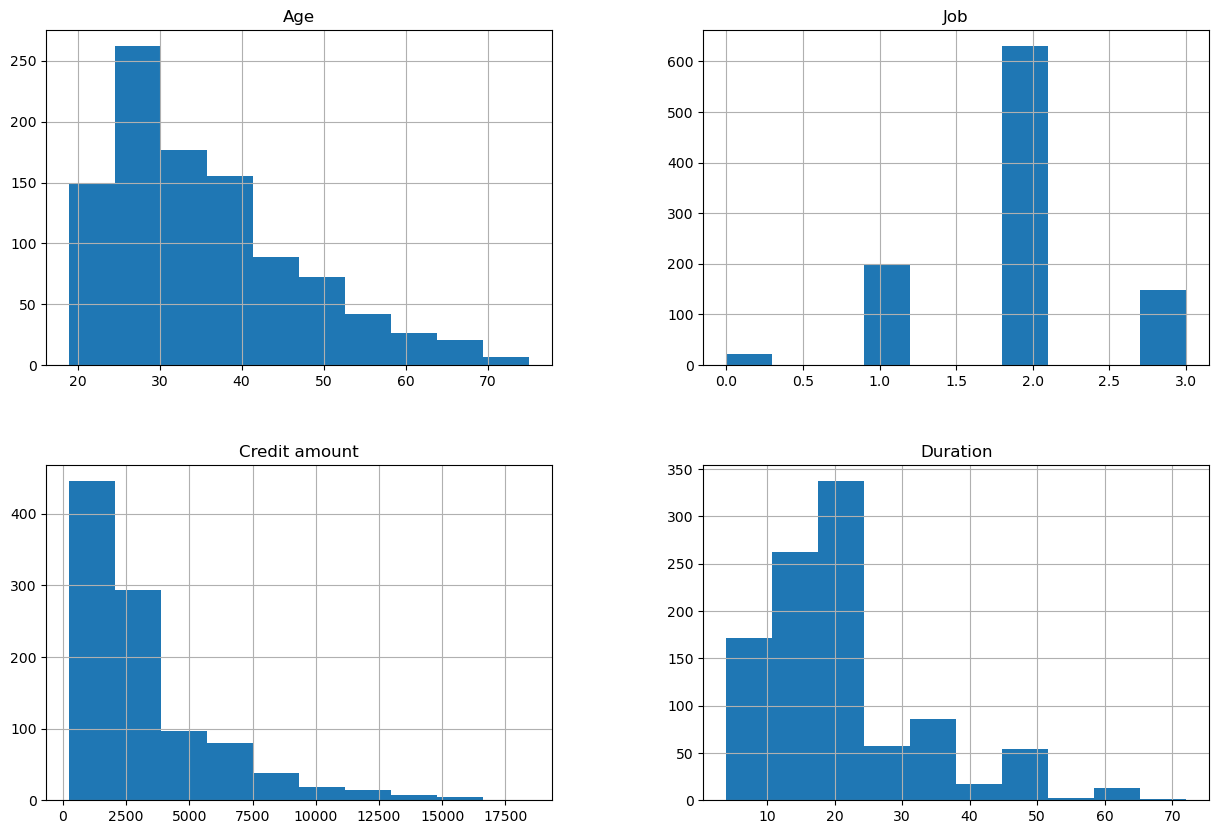

In [12]:
# most of the people are below 45 years of age
# most of the people belongs to job class 2.0 which is unskilled and resident
# most of the people have took credit amount less than 5000
# most of the people have taken credit amount for less than 24 months
_ = credit_data.hist(figsize=(15, 10))

In [13]:
# Define colors for the bars
colors = {'bad': 'red', 'good': 'green'}

c:\Aravind's File\Projects\credit_risk\utils\eda_utils.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_distribution = data_.groupby(groupby_cols).size().unstack().apply(lambda x: x / x.sum(), axis=1)


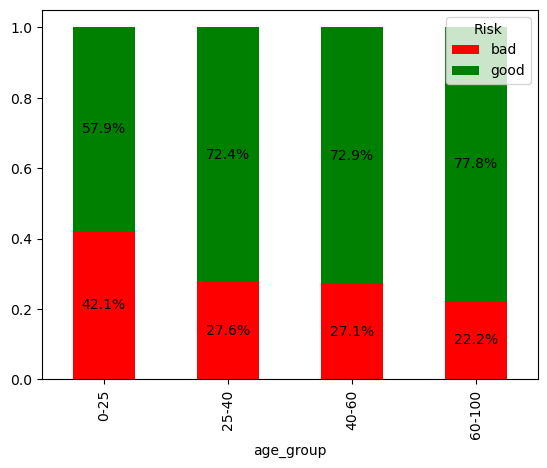

In [14]:
# Creating age groups and then plot the distribution of the target variable
credit_data['age_group'] = pd.cut(credit_data['Age'], bins=[0, 25, 40, 60, 100], labels=['0-25', '25-40', '40-60', '60-100'])
age_credit_plt =  stacked_bar_chart(credit_data, ['age_group', 'Risk'])

c:\Aravind's File\Projects\credit_risk\utils\eda_utils.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_distribution = data_.groupby(groupby_cols).size().unstack()


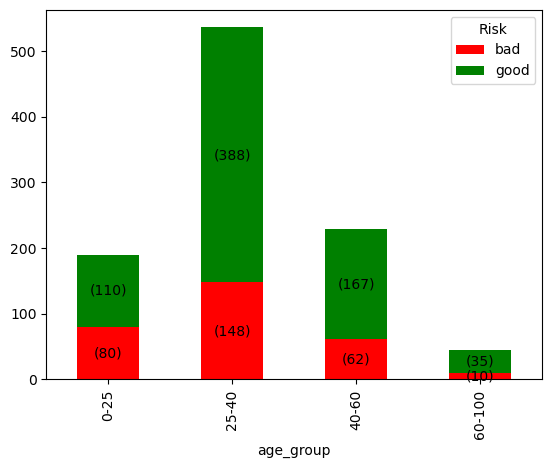

In [15]:
# Creating age groups and then plot the distribution of the target variable
age_credit_plt =  bar_chart(credit_data, ['age_group', 'Risk'])

In [16]:
# in the above chart we can easily see that people with age group 0-25 are more likely to have bad credit risk than others

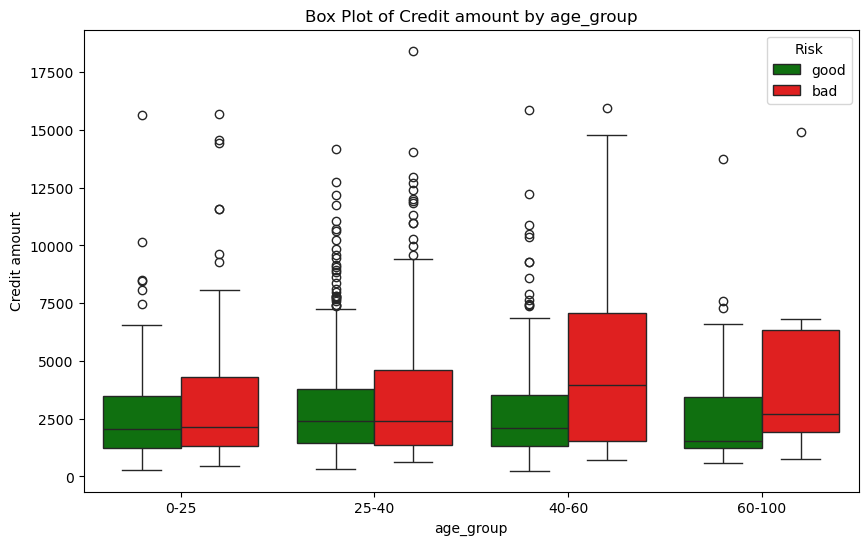

In [17]:
custom_box_plot(data_= credit_data, x_col = 'age_group', y_col = 'Credit amount', hue_col='Risk')


In [18]:
# it shows that age groups of 40-60 and 60-100 taking more credit amount is more likely to have bad credit risk

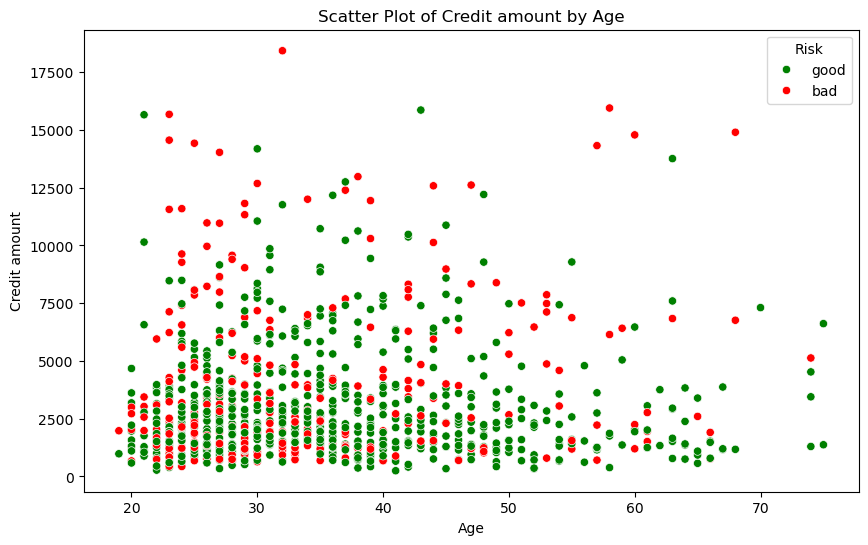

In [19]:
custom_scatter_plot(data_= credit_data, x_col = 'Age', y_col = 'Credit amount', hue_col='Risk')


In [20]:
# Not much information can be extracted from the above plot

### 2.1.2 Job Analysis

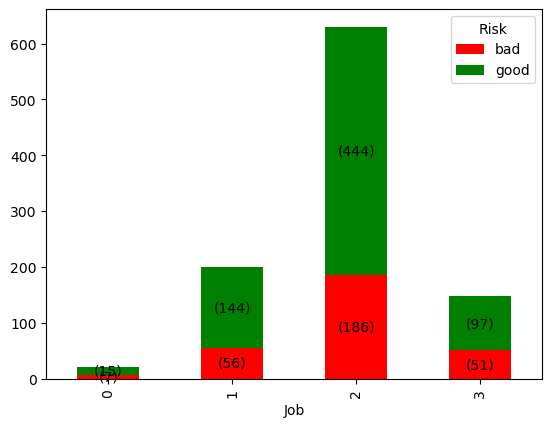

In [21]:
# Creating Job and then plot the distribution of the target variable
job_credit_plt =  bar_chart(credit_data, ['Job', 'Risk'])

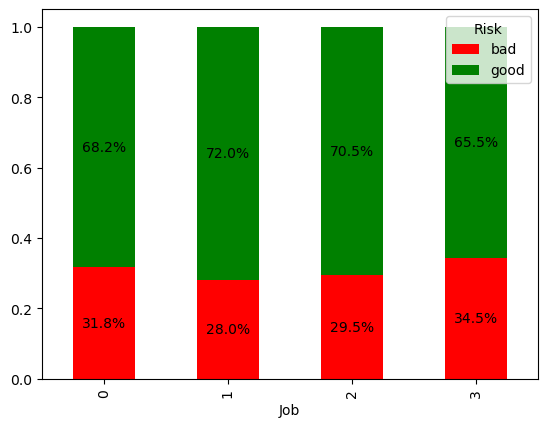

In [22]:
# Creating Job groups and then plot the distribution of the target variable
job_credit_plt =  stacked_bar_chart(credit_data, ['Job', 'Risk'])

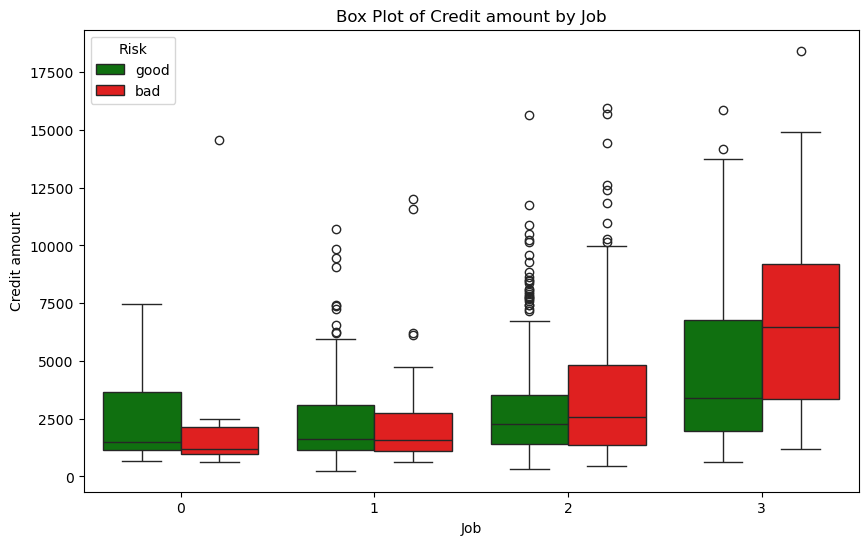

In [23]:
custom_box_plot(data_= credit_data, x_col = 'Job', y_col = 'Credit amount', hue_col='Risk')


### 2.1.3 Duration Analysis

In [24]:
credit_data['duration_group'] = pd.cut(credit_data['Duration'], bins=[0, 12, 18, 24, 100], labels=['<12 Months', '12-18 Months', '18-24 Months', '>24 Months'])


In [25]:
credit_data['Duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64

c:\Aravind's File\Projects\credit_risk\utils\eda_utils.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_distribution = data_.groupby(groupby_cols).size().unstack()


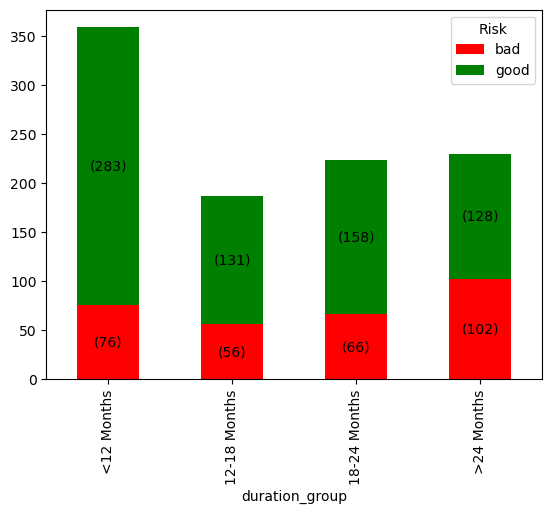

In [26]:
# Creating Duration and then plot the distribution of the target variable
duration_risk_plt =  bar_chart(credit_data, ['duration_group', 'Risk'])

c:\Aravind's File\Projects\credit_risk\utils\eda_utils.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_distribution = data_.groupby(groupby_cols).size().unstack().apply(lambda x: x / x.sum(), axis=1)


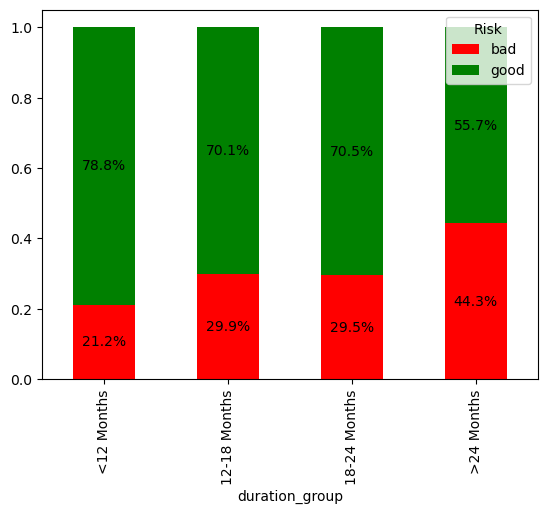

In [27]:
# Creating Duration and then plot the distribution of the target variable
duration_risk_plt =  stacked_bar_chart(credit_data, ['duration_group', 'Risk'])

In [28]:
# we can see that as duration of credit increases the risk of bad credit also increases

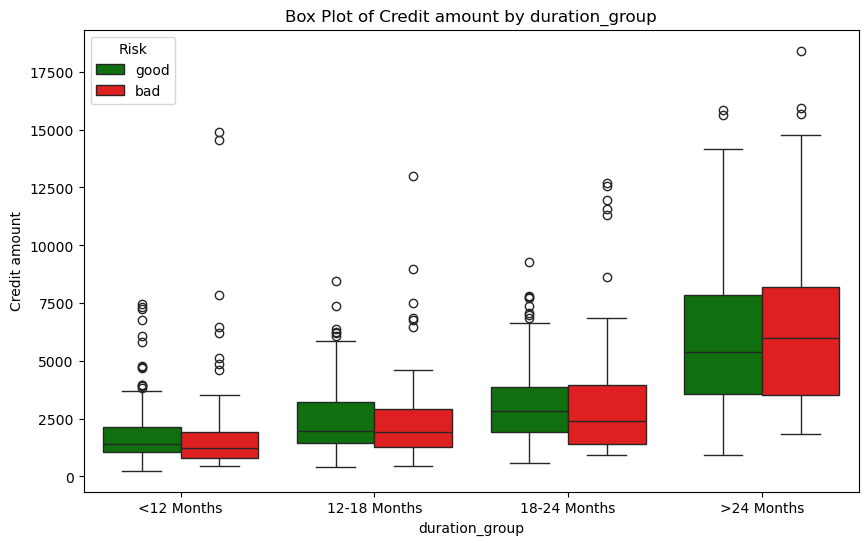

In [29]:
custom_box_plot(data_= credit_data, x_col = 'duration_group', y_col = 'Credit amount', hue_col='Risk')


In [30]:
# credit amount increases as duration increases which makes sense

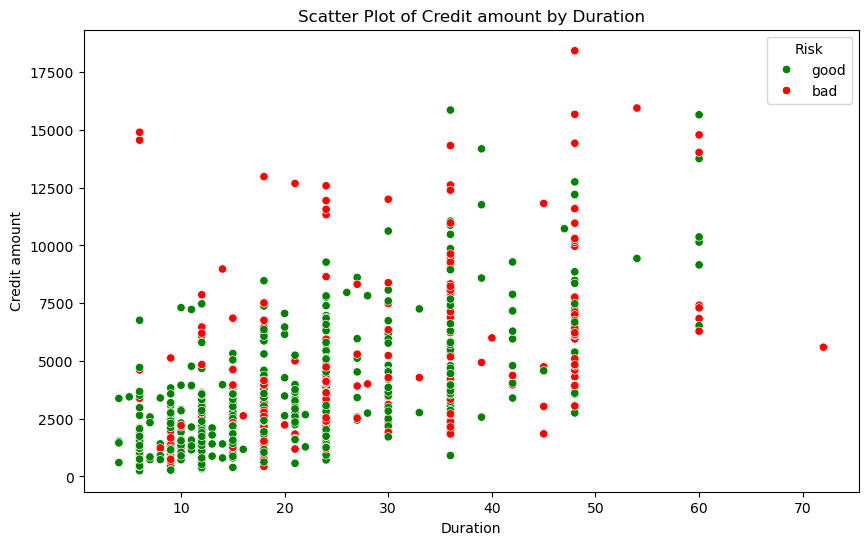

In [31]:
custom_scatter_plot(data_= credit_data, x_col = 'Duration', y_col = 'Credit amount', hue_col='Risk')


In [32]:
# We can see that in the shorter duration the smaller credit amounts have slighly less risk
# as duration increases the risk of bad credit also increases irrespective of amount

## 2.2 Categorical Variables

### 2.2.1 Sex vs Risk

In [33]:
credit_data['Sex'].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

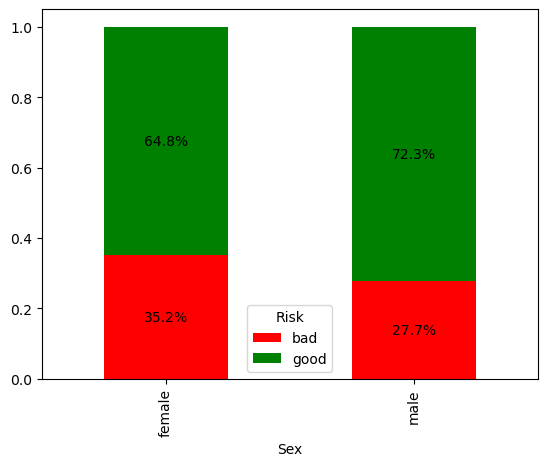

In [34]:
sex_credit_plt =  stacked_bar_chart(credit_data, ['Sex', 'Risk'])

In [35]:
# the above chart shows that females are slighly prone to bad credit

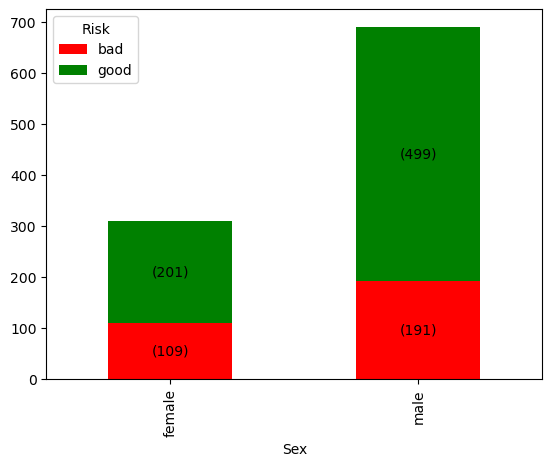

In [36]:
sex_credit_plt =  bar_chart(credit_data, ['Sex', 'Risk'])

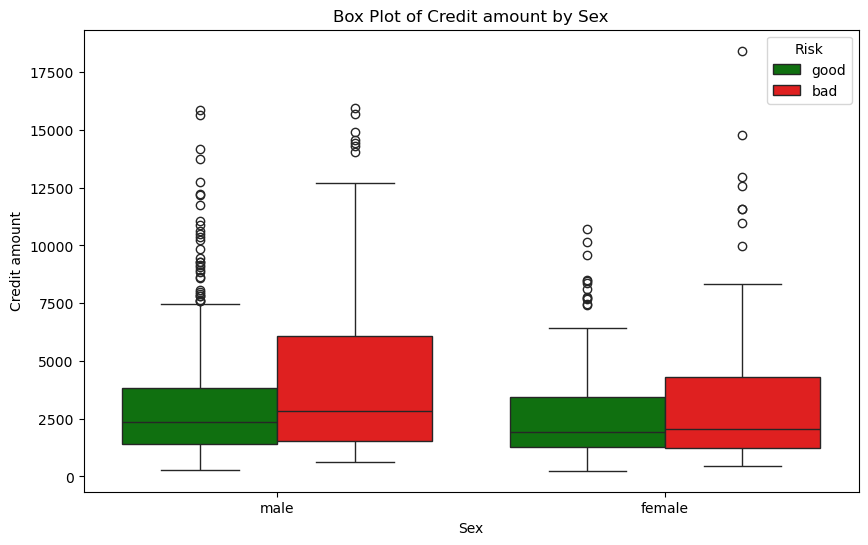

In [37]:
custom_box_plot(data_= credit_data, x_col = 'Sex', y_col = 'Credit amount', hue_col='Risk')


In [38]:
# The above chart shows that males who take higher credit amount are more likely to have bad credit risk

### 2.2.2 Housing and Risk

In [39]:
credit_data['Housing'].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

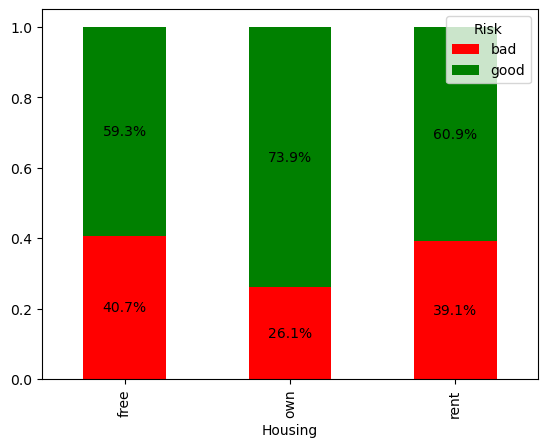

In [40]:
house_credit_plt =  stacked_bar_chart(credit_data, ['Housing', 'Risk'])

In [41]:
# it shows that own house people are more likely to have good credit risk

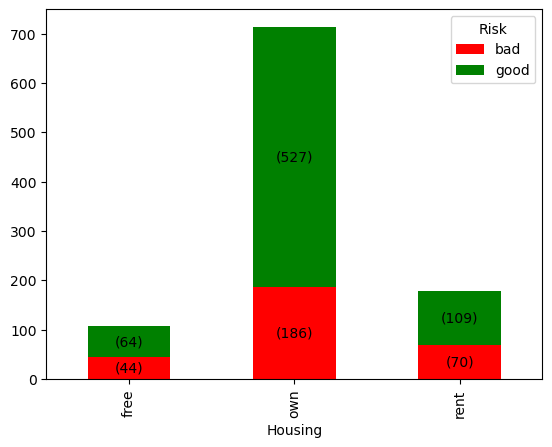

In [42]:
house_credit_plt =  bar_chart(credit_data, ['Housing', 'Risk'])

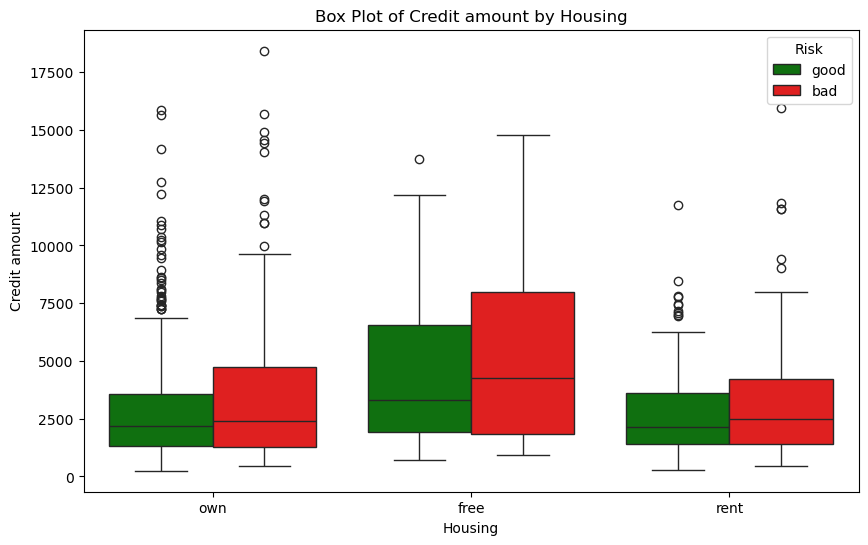

In [43]:
custom_box_plot(data_= credit_data, x_col = 'Housing', y_col = 'Credit amount', hue_col='Risk')


In [44]:
# It shows that free housing people have taken more credit amount and are more likely to have bad credit risk

### 2.2.3 Savings Account vs Risk

In [48]:
credit_data['Saving accounts'].value_counts()

Saving accounts
little        603
unknown       183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [46]:
credit_data['Saving accounts'].isnull().sum()

np.int64(183)

In [47]:
credit_data['Saving accounts'] = credit_data['Saving accounts'].fillna('unknown')

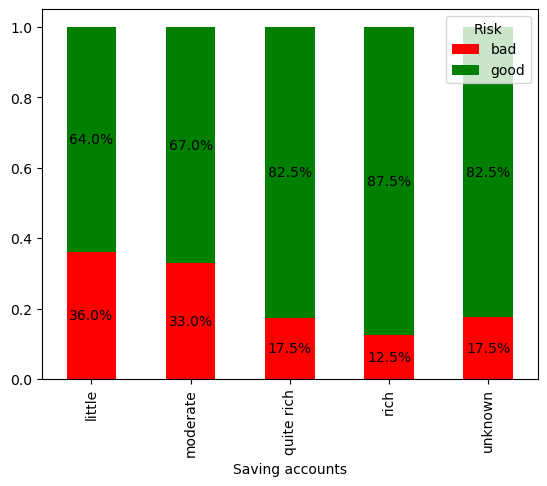

In [49]:
savings_credit_plt =  stacked_bar_chart(credit_data, ['Saving accounts', 'Risk'])

In [50]:
# The above chart shows that people with little savings are more likely to have bad credit risk

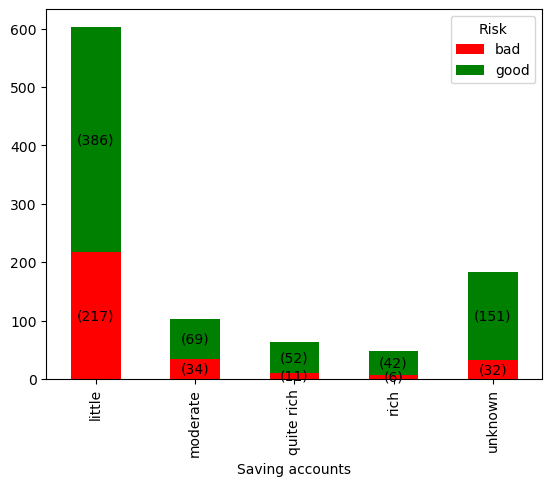

In [51]:
savings_credit_plt =  bar_chart(credit_data, ['Saving accounts', 'Risk'])

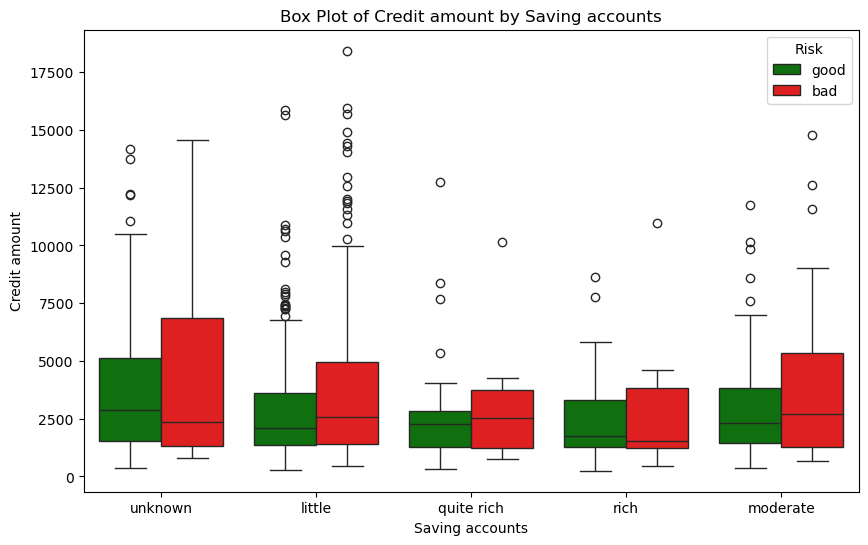

In [52]:
custom_box_plot(data_= credit_data, x_col = 'Saving accounts', y_col = 'Credit amount', hue_col='Risk')


In [53]:
# The above chart shows that people with little savings are more likely to take mroe credit and have bad credit risk

### 2.2.4 Checking account vs Risk

In [54]:
credit_data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [55]:
credit_data['Checking account'].isnull().sum()

np.int64(394)

In [ ]:
# It has almost 40% of missing data. This column might not be much useful. We'll check it later

In [57]:
credit_data['Checking account'] = credit_data['Checking account'].fillna('unknown')

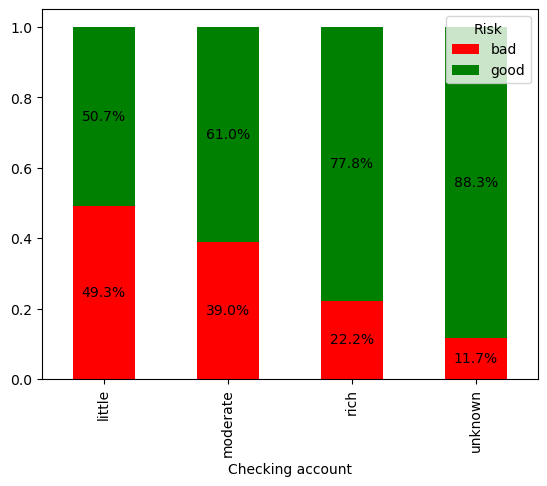

In [58]:
checking_credit_plt =  stacked_bar_chart(credit_data, ['Checking account', 'Risk'])

In [60]:
# It has valuable information as people with little checking account are more likely to have bad credit risk

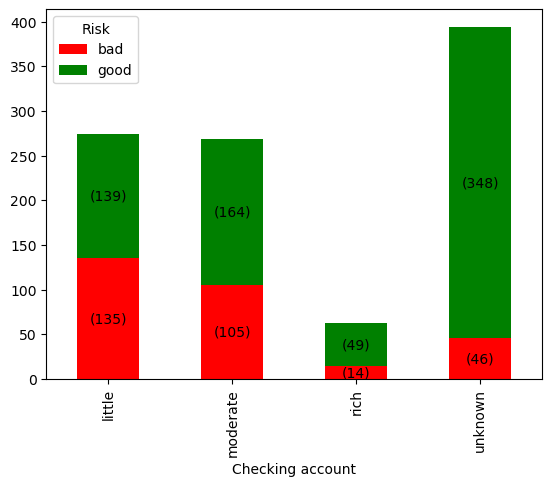

In [59]:
checking_credit_plt =  bar_chart(credit_data, ['Checking account', 'Risk'])

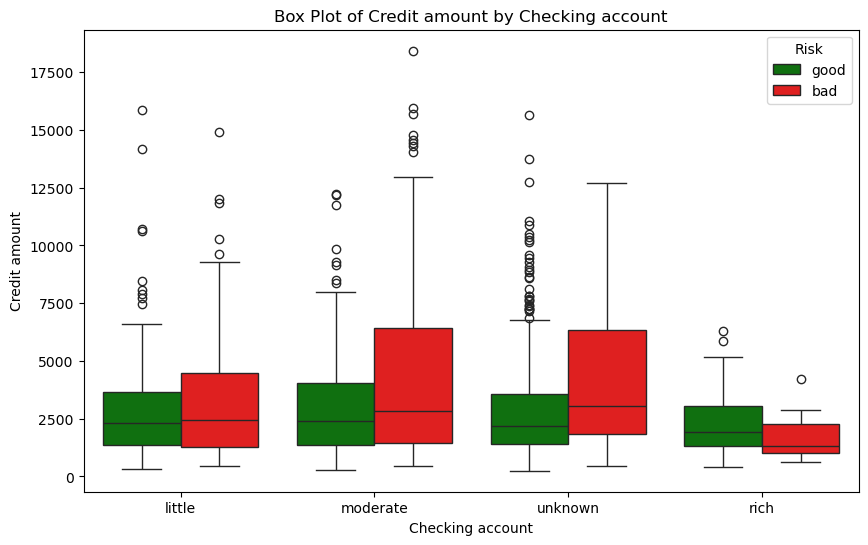

In [61]:
custom_box_plot(data_= credit_data, x_col = 'Checking account', y_col = 'Credit amount', hue_col='Risk')


In [62]:
pd.crosstab(credit_data['Saving accounts'], credit_data['Checking account'])

Checking account,little,moderate,rich,unknown
Saving accounts,,,,
little,219,152,41,191
moderate,12,47,5,39
quite rich,8,11,4,40
rich,6,14,3,25
unknown,29,45,10,99


In [63]:
pd.crosstab(credit_data['Saving accounts'], 
            credit_data['Checking account'], normalize='index')

Checking account,little,moderate,rich,unknown
Saving accounts,,,,
little,0.363184,0.252073,0.067993,0.316750
moderate,0.116505,0.456311,0.048544,0.378641
quite rich,0.126984,0.174603,0.063492,0.634921
rich,0.125000,0.291667,0.062500,0.520833
unknown,0.158470,0.245902,0.054645,0.540984


### 2.5.5 Purpose vs Risk

In [64]:
credit_data['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

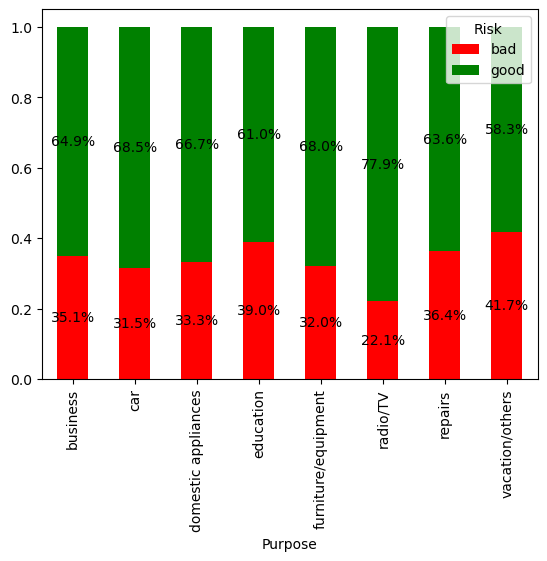

In [66]:
purpose_credit_plt =  stacked_bar_chart(credit_data, ['Purpose', 'Risk'])

In [68]:
# there's not much valuable from the above chart as all the purposes have almost same distribution of good and bad credit risk
# only credits who has took it for home needs are less likely to have bad credit risk

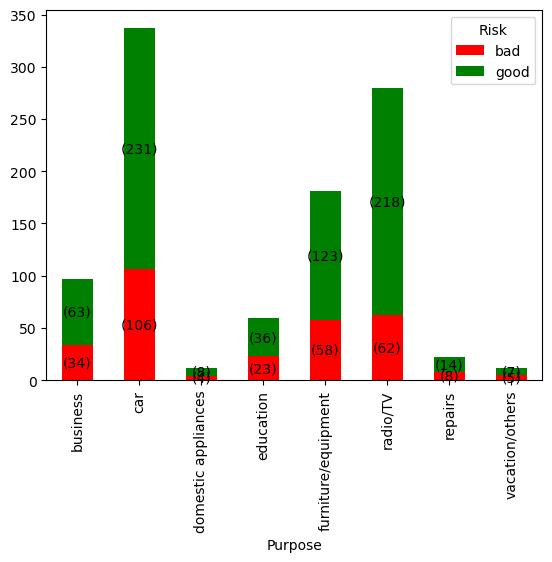

In [69]:
purpose_credit_plt =  bar_chart(credit_data, ['Purpose', 'Risk'])

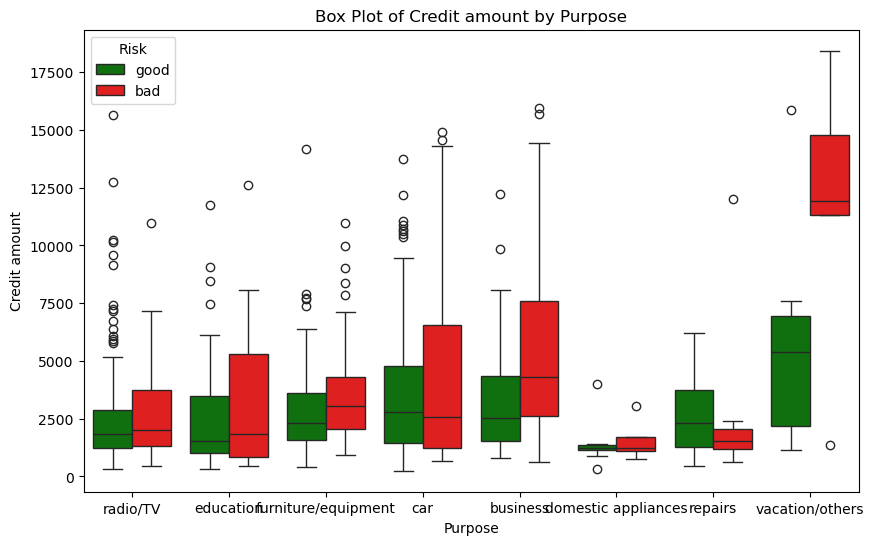

In [70]:
custom_box_plot(data_= credit_data, x_col = 'Purpose', y_col = 'Credit amount', hue_col='Risk')
